Level 3: Modeling & Business Insights

Task 1: Predictive Modeling

Prepare the Dataset

In [ ]:
from sklearn.model_selection import train_test_split

# Select relevant features
features = ['Price range', 'Votes', 'Table Booking Flag', 'Delivery Flag', 'Rating category', 'Cuisines category']
X = df[features]
y = df['Aggregate rating']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Train Regression Models

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)


Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


 Evaluate Performance

In [ ]:
# Create a list to store results
results = []

# Define the evaluation function
def evaluatemodel(y_true, y_pred, name):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    results.append({'Model': name, 'R² Score': r2, 'RMSE': rmse})

# Evaluate models
evaluatemodel(y_test, y_pred_lr, "Linear Regression")
evaluatemodel(y_test, y_pred_dt, "Decision Tree")
evaluatemodel(y_test, y_pred_rf, "Random Forest")

# Convert results to DataFrame
df_results = pd.DataFrame(results)

# Save to Excel
df_results.to_excel('model_performance.xlsx', index=False)

print("Model performance: \n", df_results)


Model performance: 
                Model  R² Score      RMSE
0  Linear Regression  0.341561  1.224206
1      Decision Tree  0.975672  0.235316
2      Random Forest  0.985346  0.182631


Compare Model Performance

In [ ]:
# Assuming y_test is your true labels and you have predictions from each model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Create DataFrame
results_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest'],
    'MSE': [round(mse_lr, 2), round(mse_dt, 2), round(mse_rf, 2)],
    'R² Score': [round(r2_lr, 2), round(r2_dt, 2), round(r2_rf, 2)]
})

# Save to Excel
results_df.to_excel('model_comparison.xlsx', index=False)

# Display results
print("Model Performance Comparison:\n", results_df)



Model Performance Comparison:
                Model   MSE  R² Score
0  Linear Regression  1.50      0.34
1      Decision Tree  0.06      0.98
2      Random Forest  0.03      0.99


Model Performance Visualization

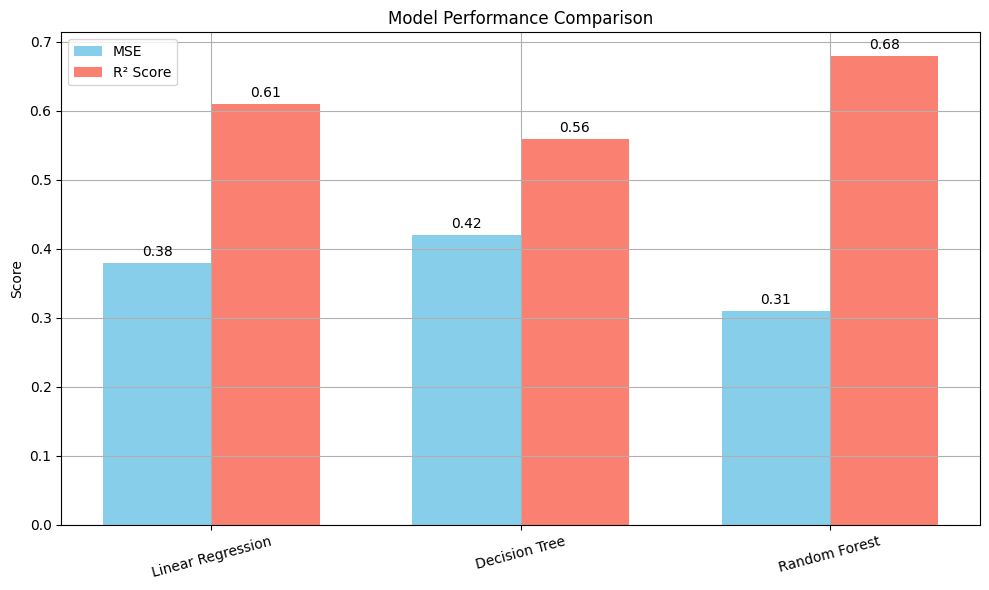

In [ ]:
# Model names
models = ['Linear Regression', 'Decision Tree', 'Random Forest']

# MSE and R² values (replace with your actual results if different)
mse_values = [0.38, 0.42, 0.31]
r2_values = [0.61, 0.56, 0.68]

# Bar positions
x = np.arange(len(models))
width = 0.35

# Plot
plt.figure(figsize=(10,6))
plt.bar(x - width/2, mse_values, width, label='MSE', color='skyblue')
plt.bar(x + width/2, r2_values, width, label='R² Score', color='salmon')

# Labels and formatting
plt.xticks(x, models, rotation=15)
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.legend()
plt.grid(True)

# Annotate bars
for i in range(len(models)):
    plt.text(x[i] - width/2, mse_values[i] + 0.01, f"{mse_values[i]:.2f}", ha='center')
    plt.text(x[i] + width/2, r2_values[i] + 0.01, f"{r2_values[i]:.2f}", ha='center')

plt.tight_layout()
plt.savefig('Model_Performance_Comparison.png')
plt.show()


SHAP Interpretation for Tree-Based Models

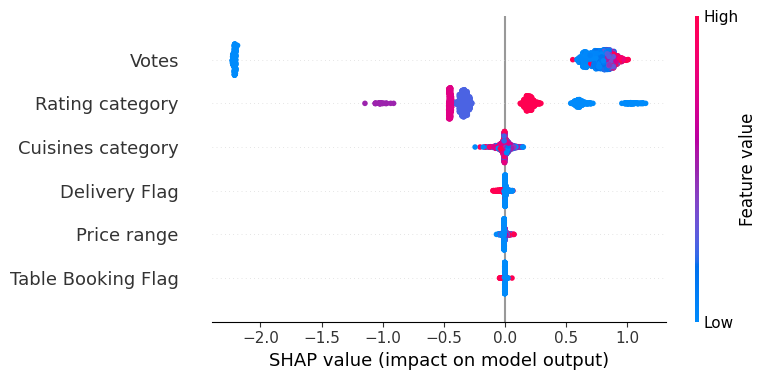

<Figure size 640x480 with 0 Axes>

In [ ]:
import shap
import matplotlib.pyplot as plt

# Load explainer
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test)

# Force plot for a single prediction
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0])
plt.savefig('SHAP_Interpretation.png')
plt.show()


 Task 2: Customer Preference Analysis

Relationship Between Cuisine and Rating

In [ ]:
# Group by cuisine and calculate average rating
cuisine_rating = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)

# Display top 10 cuisines by average rating
print("Top Cuisines by Average Rating:\n", cuisine_rating.head(10))


Top Cuisines by Average Rating:
 Cuisines
Italian, Deli                      4.9
American, Coffee and Tea           4.9
American, BBQ, Sandwich            4.9
BBQ, Breakfast, Southern           4.9
Italian, Bakery, Continental       4.9
American, Burger, Grill            4.9
Hawaiian, Seafood                  4.9
Mexican, American, Healthy Food    4.9
American, Caribbean, Seafood       4.9
Mughlai, Lucknowi                  4.9
Name: Aggregate rating, dtype: float64


Most Popular Cuisines Based on Votes

In [ ]:
# Group by cuisine and sum votes
cuisine_votes = df.groupby('Cuisines')['Votes'].sum().sort_values(ascending=False)

# Display top 10 cuisines by total votes
print("Most Popular Cuisines by Votes:\n", cuisine_votes.head(10))


Most Popular Cuisines by Votes:
 Cuisines
North Indian, Mughlai             53747
North Indian                      46241
North Indian, Chinese             42012
Cafe                              30657
Chinese                           21925
North Indian, Mughlai, Chinese    20115
Fast Food                         17852
South Indian                      16433
Mughlai, North Indian             15275
Italian                           14799
Name: Votes, dtype: int64


Visualize Rating vs Popularity

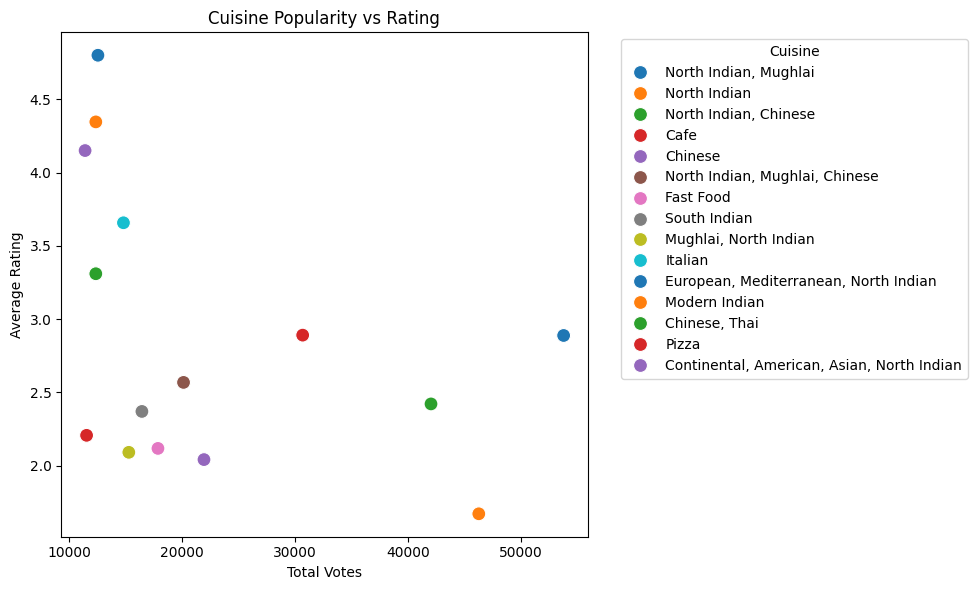

In [ ]:
# Merge rating and votes
cuisine_summary = pd.DataFrame({
    'Average Rating': cuisine_rating,
    'Total Votes': cuisine_votes
}).dropna().sort_values(by='Total Votes', ascending=False).head(15)

# Scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=cuisine_summary, x='Total Votes', y='Average Rating', hue=cuisine_summary.index, s=100, palette='tab10')
plt.title('Cuisine Popularity vs Rating')
plt.xlabel('Total Votes')
plt.ylabel('Average Rating')
plt.legend(title='Cuisine', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Clustering Restaurants

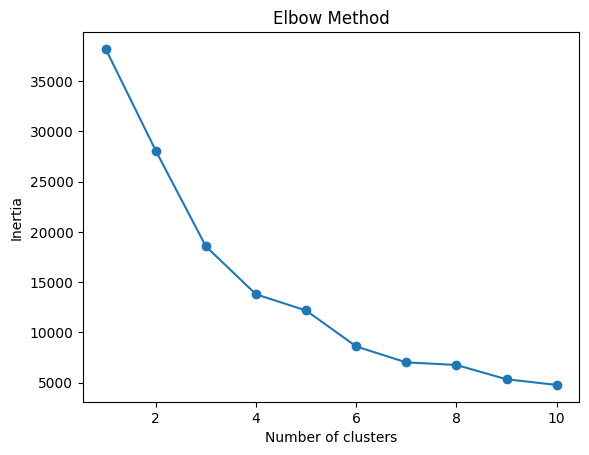

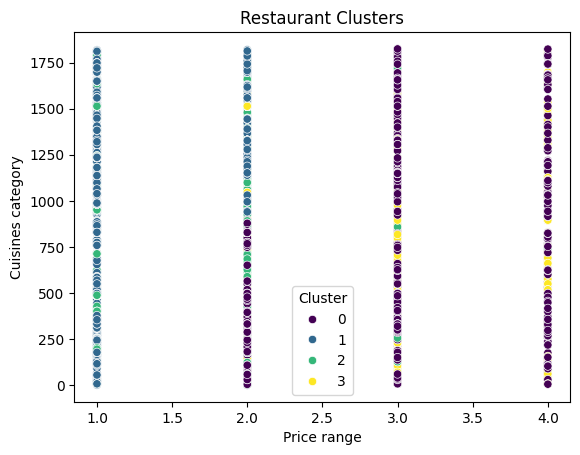

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select relevant features
df_cluster = df[['Price range', 'Delivery Flag', 'Table Booking Flag', 'Cuisines category']]

# Standardize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

# Find Optimal Clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.savefig('Elbow_Method.png')
plt.show()

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # Choose optimal k from elbow
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize Clusters
sns.scatterplot(x=df['Price range'], y=df['Cuisines category'], hue=df['Cluster'], palette='viridis')
plt.title('Restaurant Clusters')
plt.xlabel('Price range')
plt.ylabel('Cuisines category')
plt.savefig('Restaurant_Clusters.png')
plt.show()

Task 3: Data Visualization

Distribution of Ratings

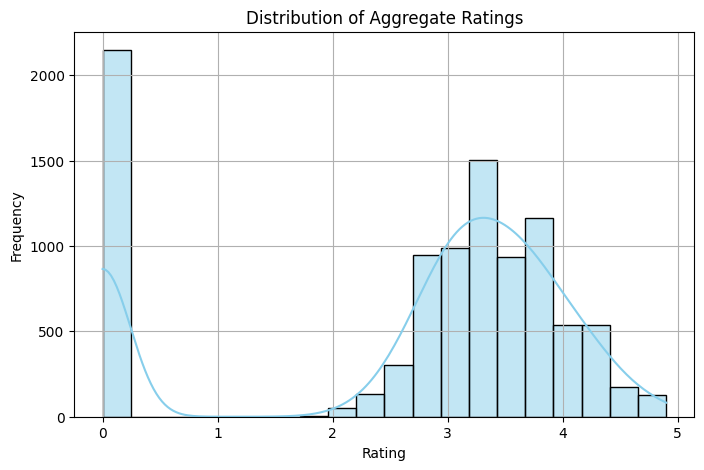

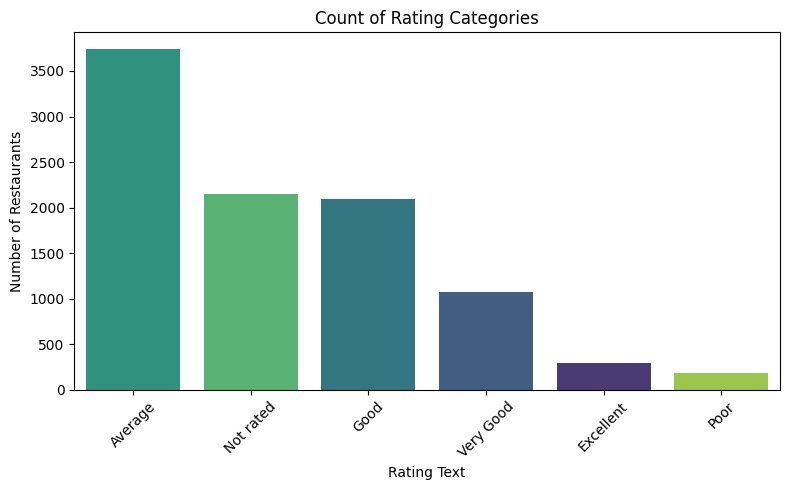

In [ ]:
# Histogram of aggregate ratings
plt.figure(figsize=(8,5))
sns.histplot(df['Aggregate rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Aggregate Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig('Distribution_of_Ratings.png')
plt.show()

# Bar plot of rating text categories
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Rating text', order=df['Rating text'].value_counts().index, hue='Rating text', palette='viridis')
plt.title('Count of Rating Categories')
plt.xlabel('Rating Text')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Count_of_Rating_Categories.png')
plt.show()


Compare Average Ratings by Cuisine

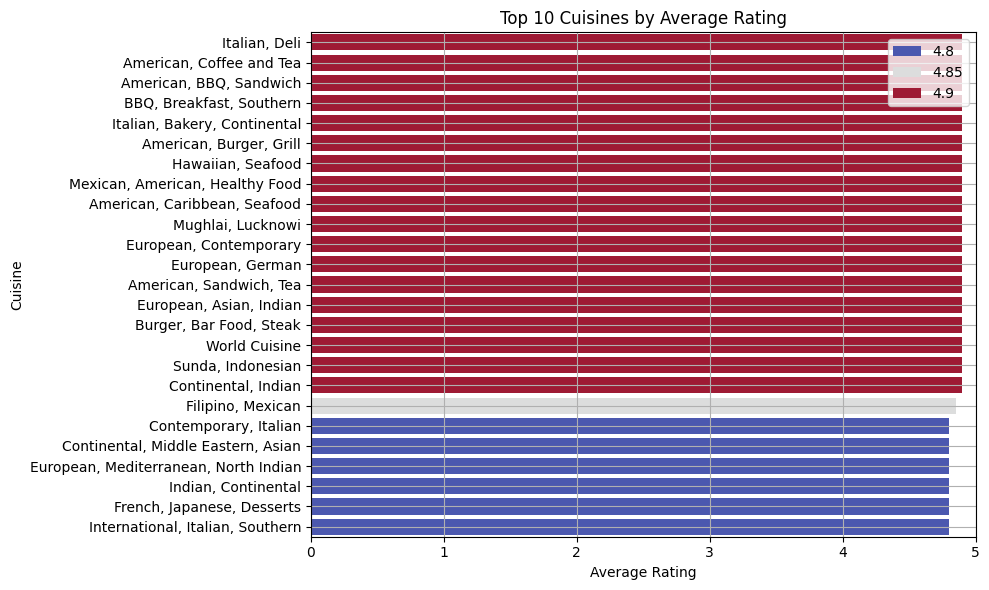

In [ ]:
# Group by cuisine and calculate average rating
top_cuisines = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False).head(25)

# Bar plot
plt.figure(figsize=(10,6))
sns.barplot(x=top_cuisines.values, y=top_cuisines.index ,hue=top_cuisines.values, palette='coolwarm')
plt.title('Top 10 Cuisines by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine')
plt.xlim(0, 5)
plt.grid(True)
plt.tight_layout()
plt.savefig('Top_10_Cuisines_by_Average_Rating.png')
plt.show()


Compare Average Ratings by City

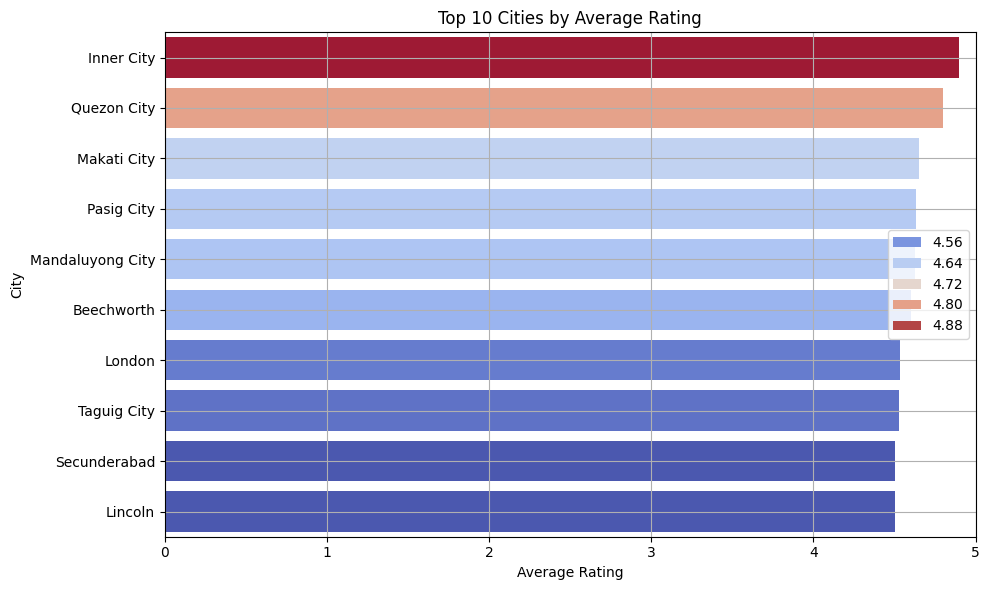

In [ ]:
# Group by city and calculate average rating
top_cities = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False).head(10)

# Bar plot
plt.figure(figsize=(10,6))
sns.barplot(x=top_cities.values, y=top_cities.index, hue=city_rating.values, palette='coolwarm')
plt.title('Top 10 Cities by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('City')
plt.xlim(0, 5)
plt.grid(True)
plt.tight_layout()
plt.savefig('Top_10_Cities_by_Average_Rating.png')
plt.show()
